In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
del df['Product_Category_2']
del df['Product_Category_3']

In [4]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Purchase                      0
dtype: int64

## Analysing Columns

In [5]:
for i in df:
    print(i,df[i].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


## Analysis by Gender


In [6]:
df['Gender'].value_counts()

Gender
M    405380
F    132197
Name: count, dtype: int64

<Axes: ylabel='count'>

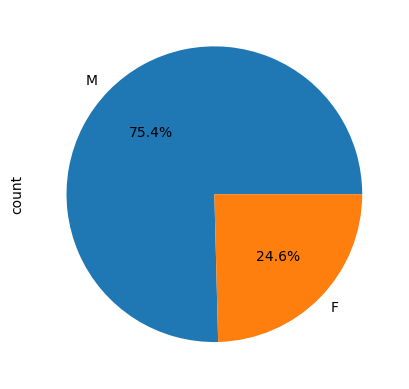

In [7]:
df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%')


<Axes: xlabel='Gender'>

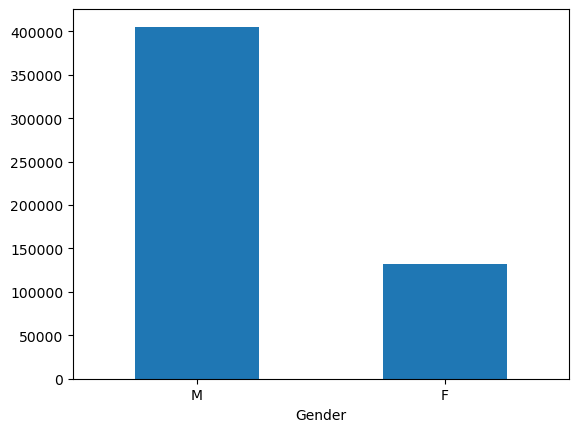

In [8]:
df['Gender'].value_counts().plot(kind='bar',rot=0)

## Analysis By Age


<Axes: xlabel='Age'>

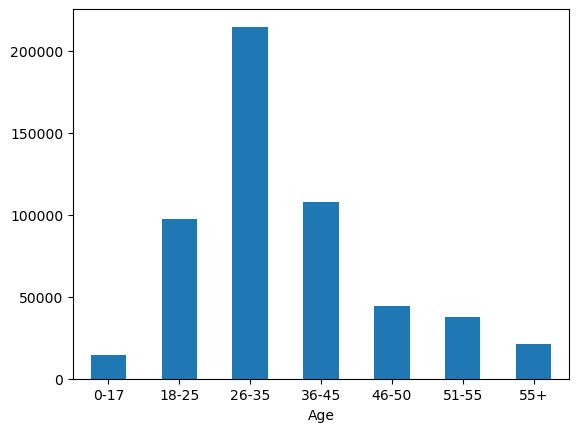

In [9]:
df.groupby('Age')['Purchase'].size().plot(kind='bar',rot=0)

In [10]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])

In [11]:
data=pd.DataFrame(lst,columns=['Age','Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

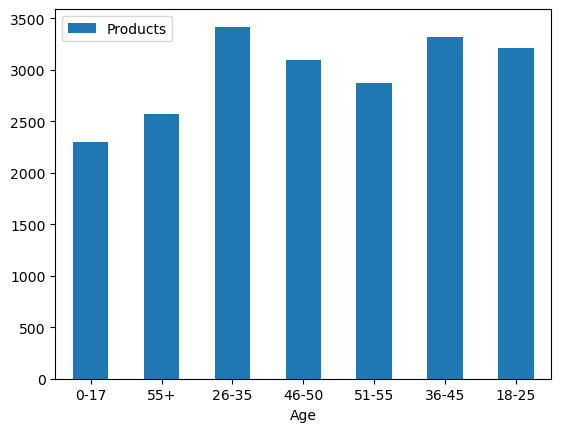

In [12]:
data.plot(kind='bar',x='Age',y='Products',rot=0)

<Axes: xlabel='Age'>

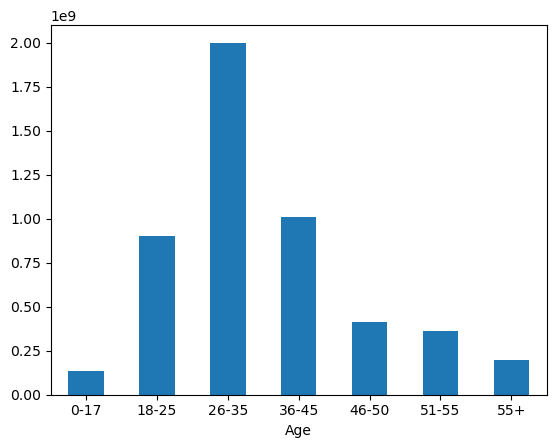

In [13]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',y='Purchase',rot=0)

<Axes: ylabel='Purchase'>

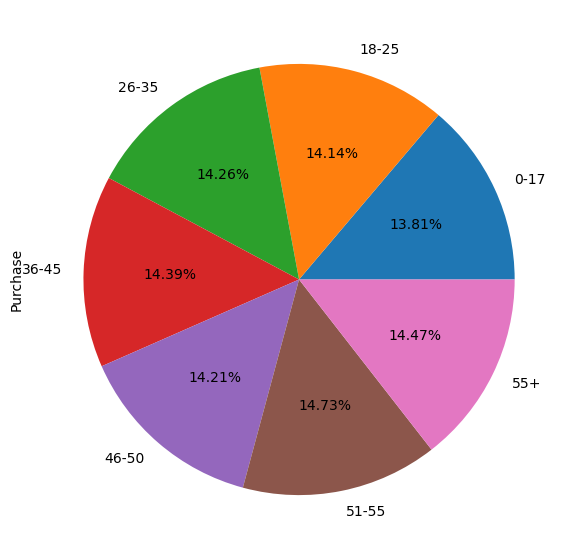

In [14]:
df.groupby('Age')['Purchase'].mean().plot(kind='pie', autopct='%1.2f%%',figsize=(7,7))


## Analysis by Marital Status

<Axes: xlabel='Marital_Status'>

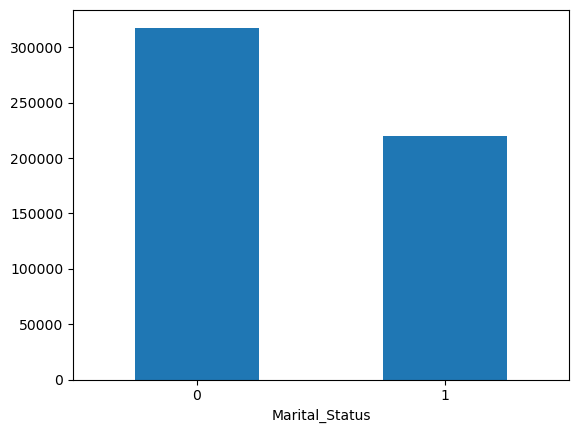

In [15]:
df['Marital_Status'].value_counts().plot(kind='bar',rot=0)

<Axes: title={'center': 'Total Spending by Marital Status'}, ylabel='Purchase'>

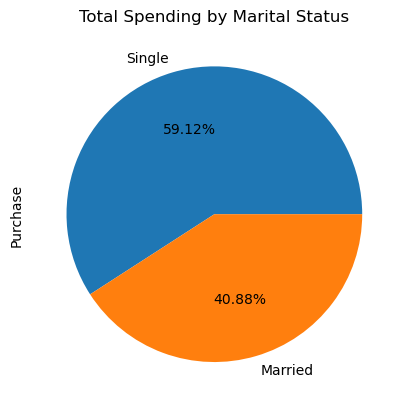

In [16]:
df.groupby('Marital_Status')['Purchase'].sum().plot(kind='pie',autopct='%1.2f%%',title='Total Spending by Marital Status',labels=['Single','Married'])

<Axes: title={'center': 'Average Spending by Marital Status'}, ylabel='Purchase'>

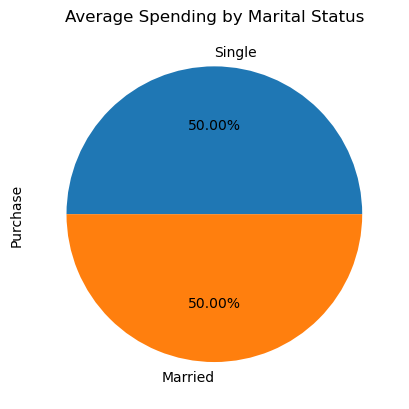

In [17]:
df.groupby('Marital_Status')['Purchase'].mean().plot(kind='pie',autopct='%1.2f%%',title='Average Spending by Marital Status',labels=['Single','Married'])

## Multi Column Analysis

<Axes: xlabel='Age', ylabel='count'>

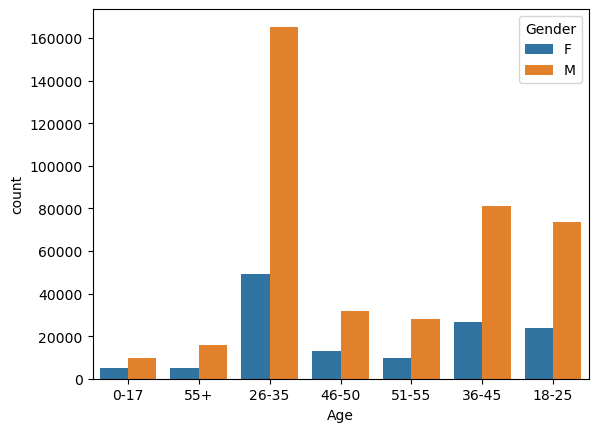

In [18]:
sns.countplot(x='Age',hue='Gender',data=df)

<Axes: xlabel='Gender', ylabel='count'>

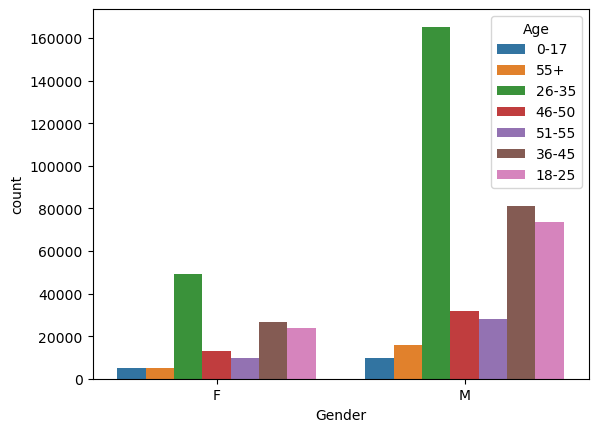

In [19]:
sns.countplot(x='Gender',hue='Age',data=df)

<Axes: xlabel='Age', ylabel='count'>

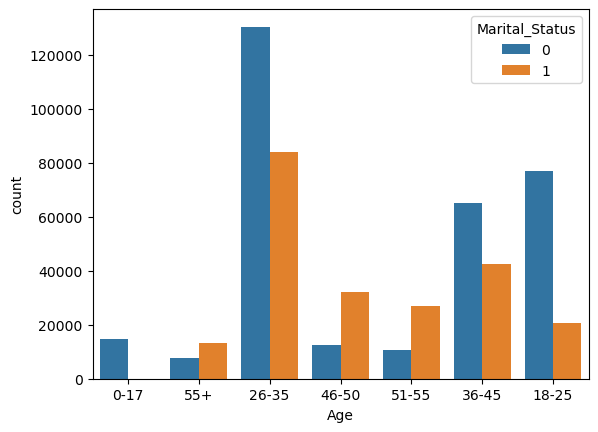

In [20]:
sns.countplot(x='Age',hue='Marital_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

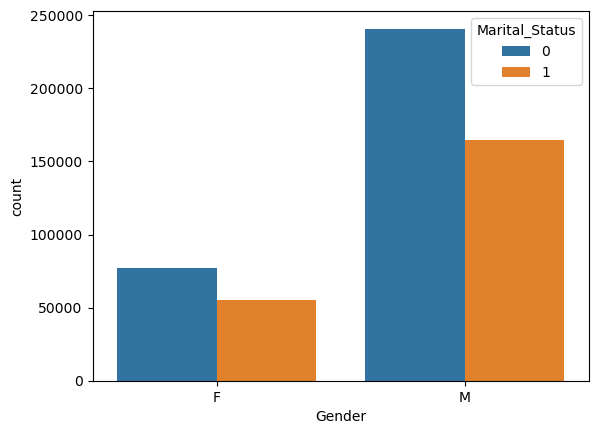

In [21]:
sns.countplot(x='Gender',hue='Marital_Status',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

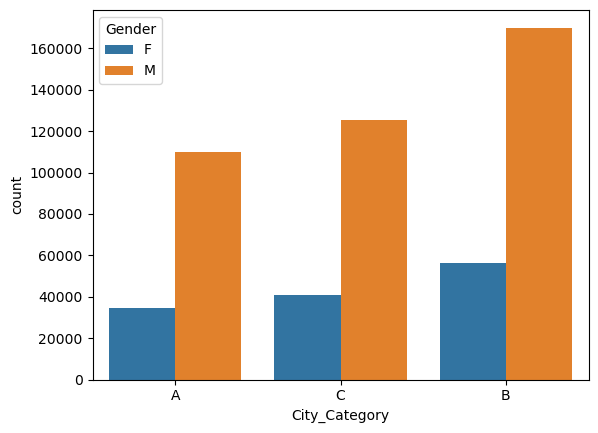

In [22]:
sns.countplot(x='City_Category',hue='Gender',data=df)

<Axes: title={'center': 'Total Spending by City Category'}, ylabel='Purchase'>

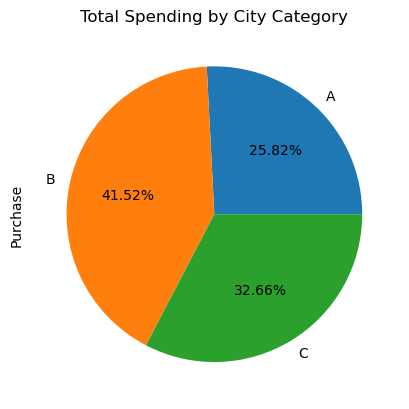

In [23]:
df.groupby('City_Category')['Purchase'].sum().plot(kind='pie',autopct='%1.2f%%',title='Total Spending by City Category')

<Axes: title={'center': 'Average Spending by City Category'}, ylabel='Purchase'>

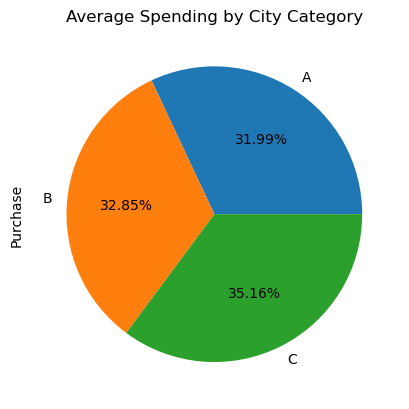

In [24]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie',autopct='%1.2f%%',title='Average Spending by City Category')

## Occupation Based Analysis


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

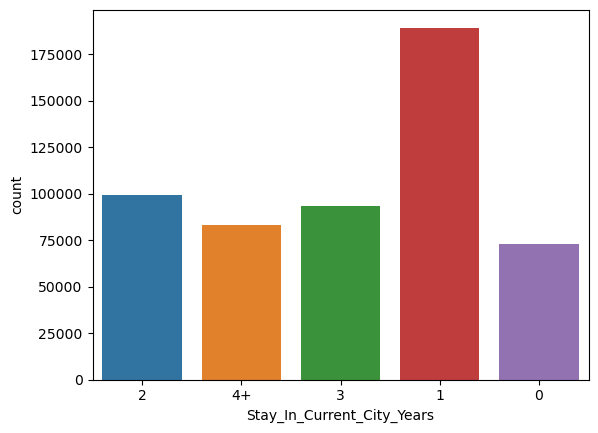

In [25]:
sns.countplot(x='Stay_In_Current_City_Years',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

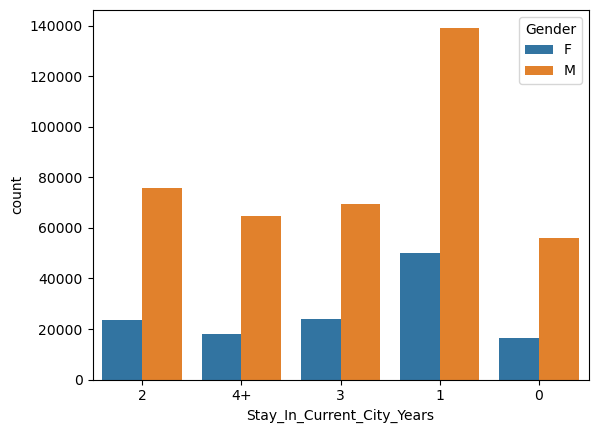

In [26]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

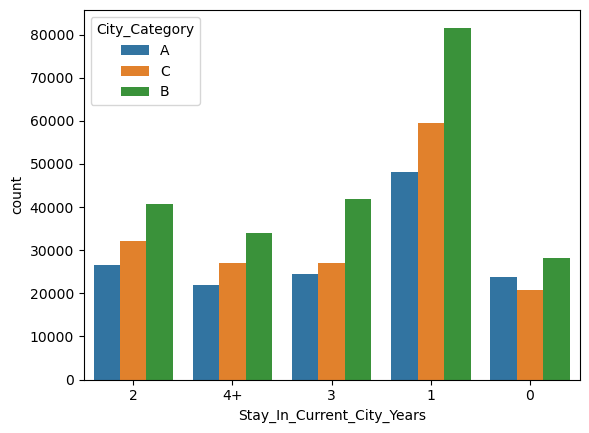

In [27]:
sns.countplot(x='Stay_In_Current_City_Years',hue='City_Category',data=df)   

<Axes: xlabel='Occupation', ylabel='count'>

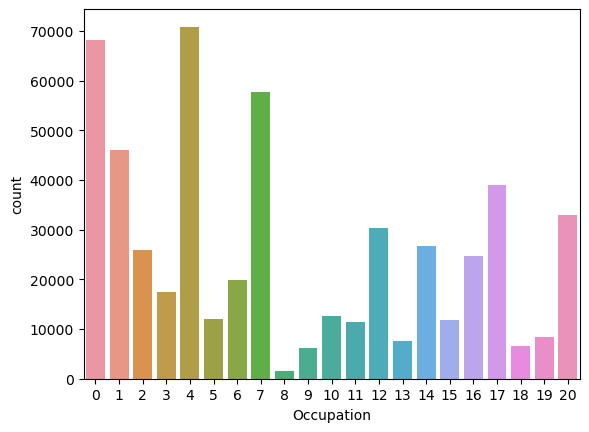

In [28]:
sns.countplot(x='Occupation',data=df)

<Axes: xlabel='Occupation'>

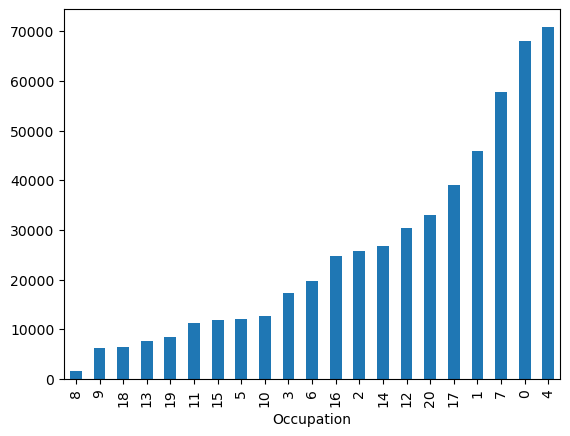

In [29]:
df['Occupation'].value_counts().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

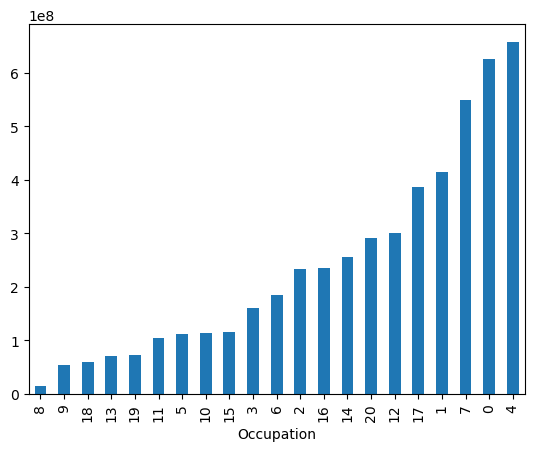

In [31]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

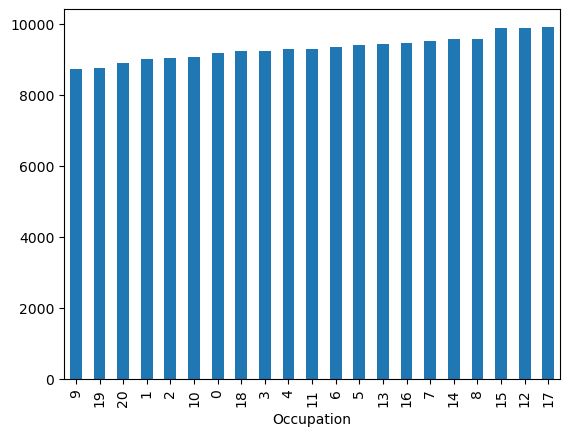

In [32]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

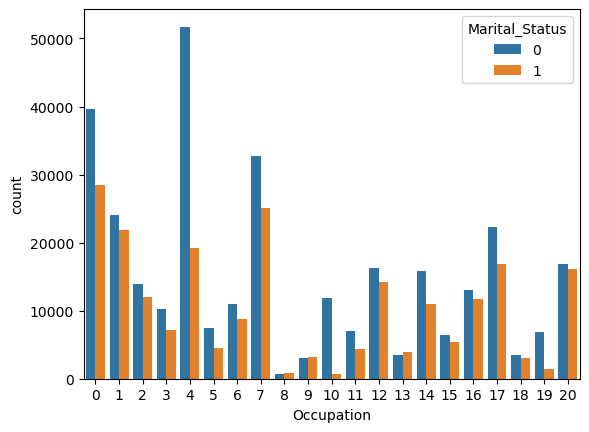

In [36]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

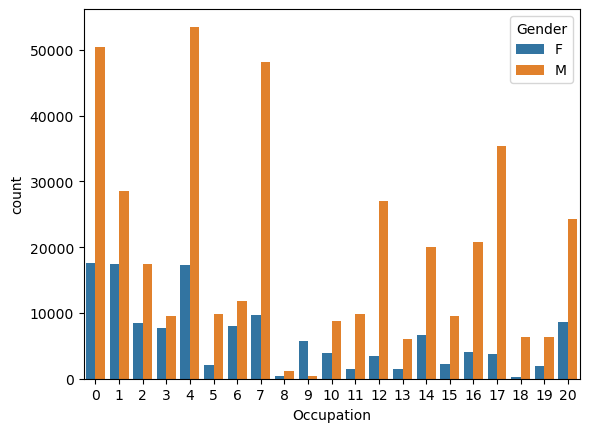

In [34]:
sns.countplot(x='Occupation',hue='Gender',data=df)

<Axes: xlabel='Occupation'>

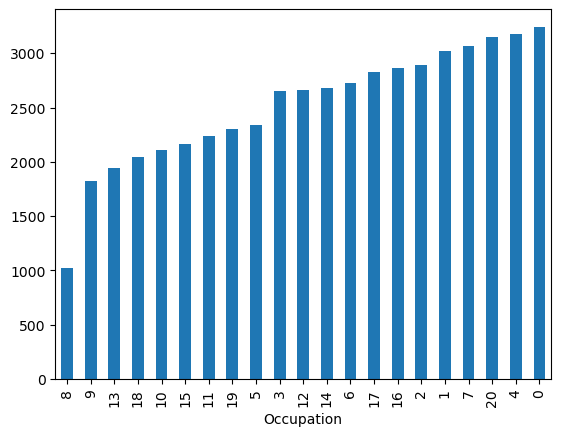

In [37]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

## Analysis on basis of Product Category

<Axes: xlabel='Product_Category_1'>

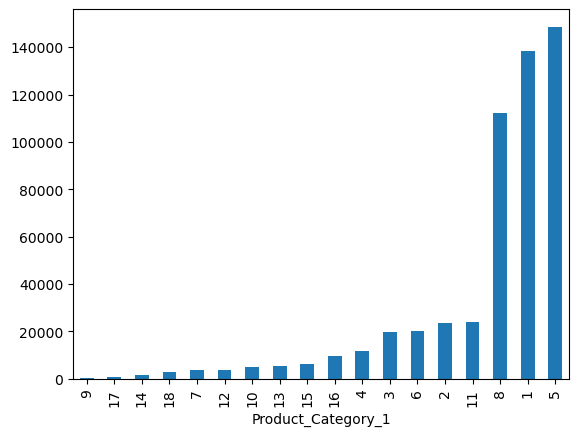

In [42]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

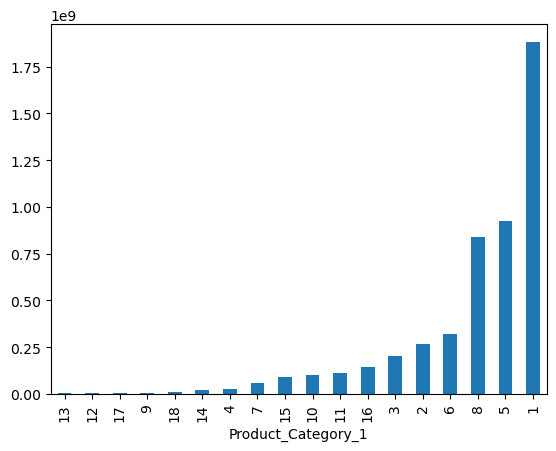

In [43]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

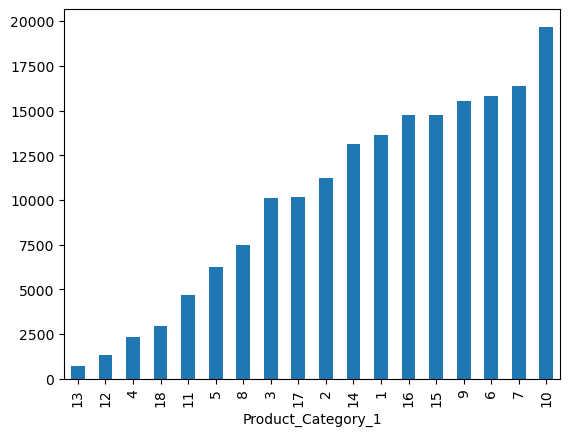

In [44]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind='bar')

## Best Selling Products Analysis


<Axes: title={'center': 'Top 10 Best Selling Products'}, xlabel='Product_ID'>

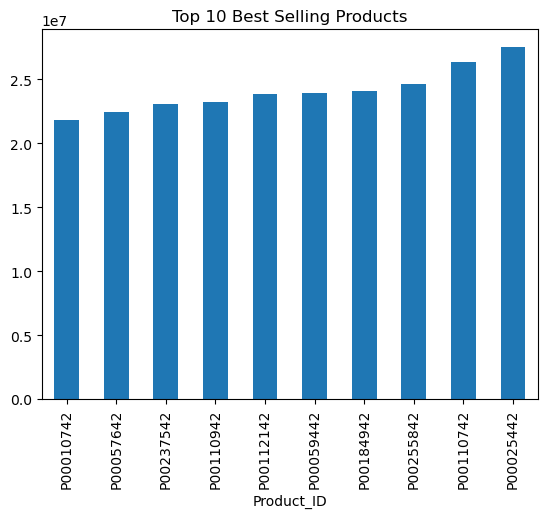

In [45]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind='bar',title='Top 10 Best Selling Products')

<Axes: title={'center': 'Top 10 Most Expensive Products'}, xlabel='Product_ID'>

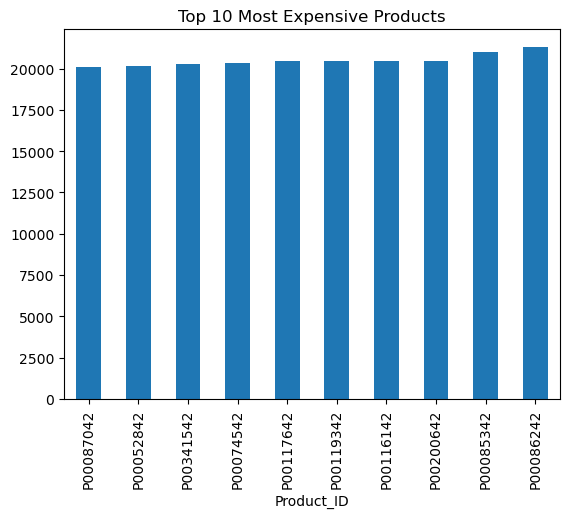

In [47]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind='bar',title='Top 10 Most Expensive Products')

## Combining Gender and Marital Status

In [48]:
lst=[]
for i in range(len(df)):
    lst.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))

In [50]:
df['Marital_Gender']=lst
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='Marital_Gender', ylabel='count'>

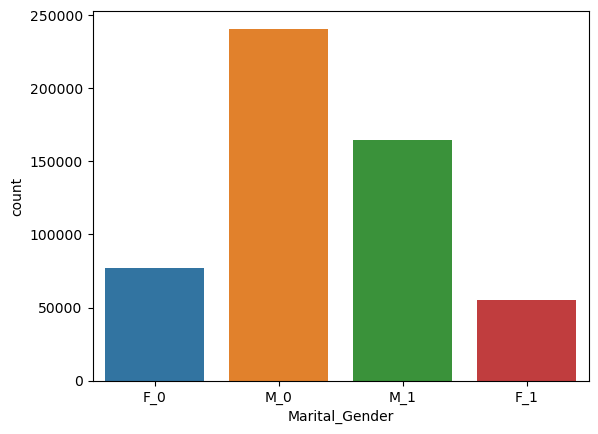

In [51]:
sns.countplot(x=df['Marital_Gender'])

<Axes: xlabel='Age', ylabel='count'>

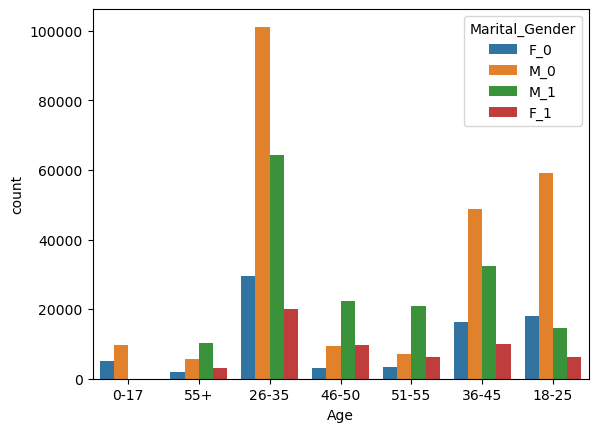

In [52]:
sns.countplot(x='Age',hue='Marital_Gender',data=df)